In [1]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [2]:
PLOT_LABEL_FONT_SIZE = 14
def getColors(n):
    """ Генерация цветовой схемы, возвращает список цветов.
    """
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS
getColors(3)

[(1.0, 0.0, 0.0, 1.0),
 (0.0, 1.0, 0.9531223422015865, 1.0),
 (1.0, 0.0, 0.09375, 1.0)]

In [3]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x: x[1], reverse=True) # сортировка по значению от большего к меньшему
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys, values)
d = {'a':1, 'b': 2}
d.items()

dict_items([('a', 1), ('b', 2)])

In [4]:
df = pd.read_csv(r'.\datas\scrubbed.csv', escapechar='`', low_memory=False)  # low_memory - считывание файла целиком, 
                                                                            #а не по частям
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
df.describe()

,longitude
count,80324.000000
mean,-86.772048
std,39.698571
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755625
max,178.441900


In [6]:
df = df.replace({'shape': None}, 'unknown')

In [7]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


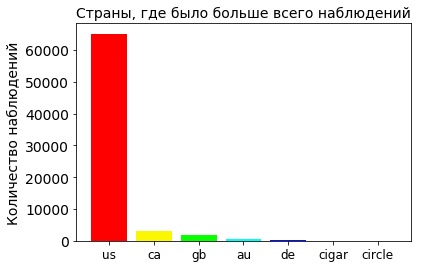

In [8]:
country_count = pd.value_counts(df['country'].values, sort=True)
country_count_keys, country_count_values = dict_sort(dict(country_count))
TOP_COUNTRY = len(country_count_keys)
plt.title('Страны, где было больше всего наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_COUNTRY),country_count_values, color=getColors(TOP_COUNTRY))
plt.xticks(np.arange(TOP_COUNTRY), country_count_keys, rotation=0, fontsize=12)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Количество наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

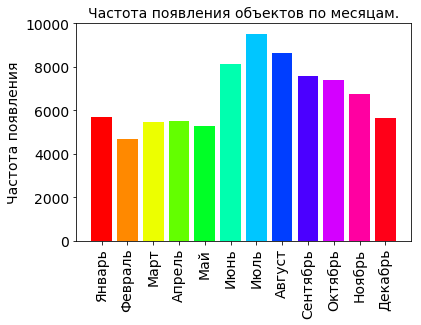

In [9]:
MONTH_COUNT = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MONTH_LABEL = ["Январь","Февраль","Март","Апрель","Май","Июнь","Июль", "Август","Сентябрь","Октябрь", "Ноябрь", "Декабрь"]

for i in df['datetime']:
    m, d, y_t = i.split('/')
    MONTH_COUNT[int(m)-1] += 1

plt.bar(np.arange(12), MONTH_COUNT, color=getColors(12))
plt.xticks(np.arange(12), MONTH_LABEL, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Частота появления', fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.title("Частота появления объектов по месяцам.", fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

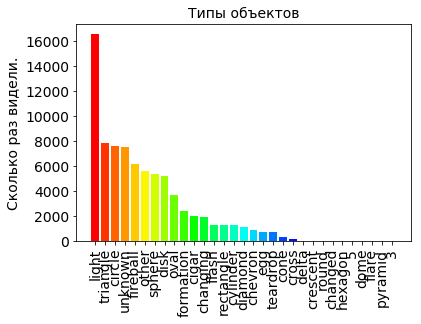

In [10]:
shapes_type_count = pd.value_counts(df['shape'].values)
shapes_type_count_keys, shapes_type_count_values = dict_sort(dict(shapes_type_count))
OBJECT_COUNT = len(shapes_type_count_keys)
plt.title("Типы объектов", fontsize=PLOT_LABEL_FONT_SIZE)
var = plt.bar(np.arange(OBJECT_COUNT), shapes_type_count_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_type_count_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel("Сколько раз видели.", fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()